In [ ]:
import importlib
from gtfs_to_geo.loader import loader
from gtfs_to_geo.geometry import shapes, stop_points
from gtfs_to_geo.network import edges, routing, indexing
from gtfs_to_geo.visualization import folium_maps
from gtfs_to_geo.analysis import building_isochrones
# Reload all modules
importlib.reload(loader)
importlib.reload(shapes)
importlib.reload(stop_points)
importlib.reload(edges)
importlib.reload(routing)
importlib.reload(indexing)
importlib.reload(folium_maps)
importlib.reload(building_isochrones)
# Import again
from gtfs_to_geo.loader.loader import GTFS
from gtfs_to_geo.geometry.shapes import *
from gtfs_to_geo.geometry.stop_points import *
from gtfs_to_geo.network.edges import *
from gtfs_to_geo.network.indexing import *
from gtfs_to_geo.network.routing import *
from gtfs_to_geo.visualization.folium_maps import *
from gtfs_to_geo.analysis.building_isochrones import *

gtfs = GTFS("data/berlin_gtfs")

In [ ]:
# pip install contextily


In [12]:
gtfs.load()

D:\Politecnico_3_semester\Geospatial_Processing\Project_GTFS\src\gtfs_to_geo\loader\loader.py:82: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


In [13]:
stops = gtfs.stops
routes = gtfs.routes
trips = gtfs.trips
stop_times = gtfs.stop_times
agency = gtfs.agency
shapes = gtfs.shapes
frequencies = gtfs.frequencies
calendar = gtfs.calendar
transfers = gtfs.transfers

In [14]:
stops.head(40)

stop_id stop_code                      stop_name  \
0     de:11000:900007104::2         5         S Nordbahnhof (Berlin)   
1     de:11000:900100007::3       NaN  S Oranienburger Str. (Berlin)   
2   de:12070:900215110:1:50       NaN          Bad Wilsnack, Bahnhof   
3   de:12070:900215110:2:51       NaN          Bad Wilsnack, Bahnhof   
4   de:12062:900415465:1:50       NaN                Prösen, Bahnhof   
5   de:12062:900415465:2:51       NaN                Prösen, Bahnhof   
6   de:12072:900245025:1:50       NaN             Rangsdorf, Bahnhof   
7   de:12072:900245025:2:51       NaN             Rangsdorf, Bahnhof   
8          de:14713:8010205       NaN          Leipzig, Hauptbahnhof   
9   de:12066:900435000:1:50       NaN           Senftenberg, Bahnhof   
10  de:12066:900435000:1:51       NaN           Senftenberg, Bahnhof   
11  de:12066:900435000:2:52       NaN           Senftenberg, Bahnhof   
12  de:12066:900435000:2:53       NaN           Senftenberg, Bahnhof   
13         de:15091:8012393       NaN             Mühlanger, Bahnhof   
14  de:12066:900435339:1:50       NaN           Großräschen, Bahnhof   
15  de:12067:900311307:1:50       NaN      Eisenhüttenstadt, Bahnhof   
16  de:12067:900311307:1:51       NaN      Eisenhüttenstadt, Bahnhof   
17  de:12069:900222030:1:50       NaN             Borkheide, Bahnhof   
18  de:12069:900222030:2:51       NaN             Borkheide, Bahnhof   
19  de:12054:900230999:1:50       NaN         S Potsdam Hauptbahnhof   
20  de:12054:900230999:2:52       NaN         S Potsdam Hauptbahnhof   
21  de:12054:900230999:1:51       NaN         S Potsdam Hauptbahnhof   
22  de:12054:900230999:2:53       NaN         S Potsdam Hauptbahnhof   
23  de:12068:900205022:1:50       NaN             Netzeband, Bahnhof   
24  de:12054:900230002:1:52       NaN       Potsdam, Pirschheide Bhf   
25  de:12054:900230002:1:50       NaN       Potsdam, Pirschheide Bhf   
26  de:12054:900230002:2:51       NaN       Potsdam, Pirschheide Bhf   
27         de:15089:8010318       NaN               Schönebeck(Elbe)   
28  de:11000:900160004:3:54       NaN   S+U Lichtenberg Bhf (Berlin)   
29  de:11000:900160004:2:52       NaN   S+U Lichtenberg Bhf (Berlin)   
30  de:11000:900160004:2:53       NaN   S+U Lichtenberg Bhf (Berlin)   
31  de:11000:900160004:3:55       NaN   S+U Lichtenberg Bhf (Berlin)   
32  de:11000:900160004:4:56       NaN   S+U Lichtenberg Bhf (Berlin)   
33  de:11000:900160004:4:57       NaN   S+U Lichtenberg Bhf (Berlin)   
34  de:12069:900220143:1:50       NaN            Bad Belzig, Bahnhof   
35  de:12069:900220143:2:51       NaN            Bad Belzig, Bahnhof   
36  de:12072:900245032:1:50       NaN            Großbeeren, Bahnhof   
37  de:12072:900245032:2:51       NaN            Großbeeren, Bahnhof   
38            de:14627:5021       NaN  Großenhain, Cottbuser Bahnhof   
39         de:15090:8011460       NaN   Eichstedt (Altmark), Bahnhof   

                                            stop_desc   stop_lat   stop_lon  \
0   Tram u. Bussteig Invalidenstraße ht. Gartenstraße  52.531683  13.388813   
1   Ersatzhalt Tucholskystraße vor Oranienburger S...  52.524724  13.392833   
2                                   Bahnsteig Gleis 2  52.960114  11.949402   
3                                   Bahnsteig Gleis 3  52.960219  11.949528   
4                                   Bahnsteig Gleis 1  51.434919  13.488216   
5                                   Bahnsteig Gleis 2  51.434886  13.488277   
6                                   Bahnsteig Gleis 1  52.294683  13.430835   
7                                   Bahnsteig Gleis 2  52.294338  13.430585   
8                                                 NaN  51.345471  12.382064   
9                                         Bahnsteig 1  51.527237  14.004368   
10                                        Bahnsteig 2  51.527283  14.004297   
11                                        Bahnsteig 3  51.527335  14.004202   
12                                      

In [15]:
lines = shapes_to_lines(shapes)

In [16]:
lines.head(30)

shape_id                                           geometry
0          1  LINESTRING (12.381 52.951, 12.384 52.949, 12.3...
1          2  LINESTRING (12.443 52.939, 12.443 52.939, 12.4...
2          3  LINESTRING (12.381 52.951, 12.384 52.949, 12.3...
3          4  LINESTRING (12.443 52.939, 12.443 52.939, 12.4...
4          5  LINESTRING (12.391 52.949, 12.387 52.95, 12.38...
5          6  LINESTRING (12.381 52.951, 12.386 52.95, 12.38...
6          7  LINESTRING (12.391 52.949, 12.391 52.949, 12.3...
7          8  LINESTRING (12.412 52.945, 12.412 52.945, 12.4...
8          9  LINESTRING (12.443 52.939, 12.443 52.939, 12.4...
9         10  LINESTRING (12.443 52.939, 12.443 52.939, 12.4...
10        11  LINESTRING (12.391 52.949, 12.387 52.95, 12.38...
11        12  LINESTRING (12.396 52.938, 12.396 52.938, 12.3...
12        13  LINESTRING (12.391 52.949, 12.391 52.949, 12.3...
13        14  LINESTRING (12.391 52.949, 12.385 52.946, 12.3...
14        15  LINESTRING (12.381 52.951, 12.386 52.95, 12.38...
15        16  LINESTRING (12.381 52.951, 12.386 52.95, 12.38...
16        17  LINESTRING (12.391 52.949, 12.391 52.949, 12.3...
17        18  LINESTRING (12.381 52.951, 12.386 52.95, 12.38...
18        19  LINESTRING (12.223 52.886, 12.228 52.885, 12.2...
19        20  LINESTRING (12.226 52.888, 12.226 52.888, 12.2...
20        21  LINESTRING (12.223 52.886, 12.228 52.885, 12.2...
21        22  LINESTRING (12.226 52.888, 12.226 52.888, 12.2...
22        23  LINESTRING (12.223 52.886, 12.228 52.885, 12.2...
23        24  LINESTRING (12.226 52.888, 12.226 52.888, 12.2...
24        25  LINESTRING (12.223 52.886, 12.228 52.885, 12.2...
25        26  LINESTRING (12.381 52.951, 12.553 52.897, 12.5...
26        27  LINESTRING (12.381 52.951, 12.386 52.95, 12.38...
27        28  LINESTRING (12.456 52.889, 12.462 52.889, 12.4...
28        29  LINESTRING (12.451 52.852, 12.441 52.856, 12.4...
29        30  LINESTRING (12.456 52.889, 12.462 52.889, 12.4...

In [ ]:
# Choose a point in Berlin interactively
from ipyleaflet import Map, Marker
from shapely.geometry import Point

stops_gdf = stops_to_gdf(stops)
origin = {"coords": None}

def handle_click(**kwargs):
    if kwargs.get("type") == "click":
        lat, lon = kwargs.get("coordinates")
        origin["coords"] = (lon, lat)
        m.layers = m.layers[:1]
        m.add_layer(Marker(location=(lat, lon)))
        print("Origin set to:", origin["coords"])

m = Map(center=(52.5, 13.38), zoom=13)
m.on_interaction(handle_click)
m


Map(center=[52.5, 13.38], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

<Axes: >

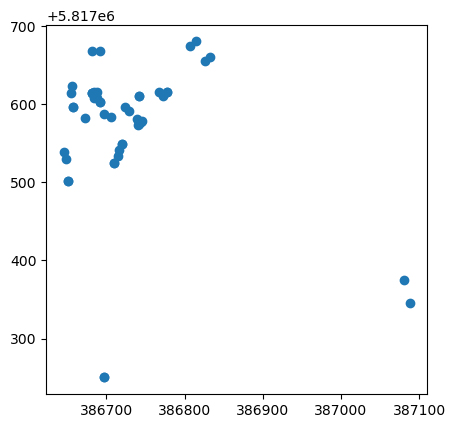

In [18]:
start_stops = find_start_stops(
    stops_gdf,
    origin=origin["coords"],
    walk_radius_m=300,
    walk_speed_kmh=4.5,
)

start_stops.plot()


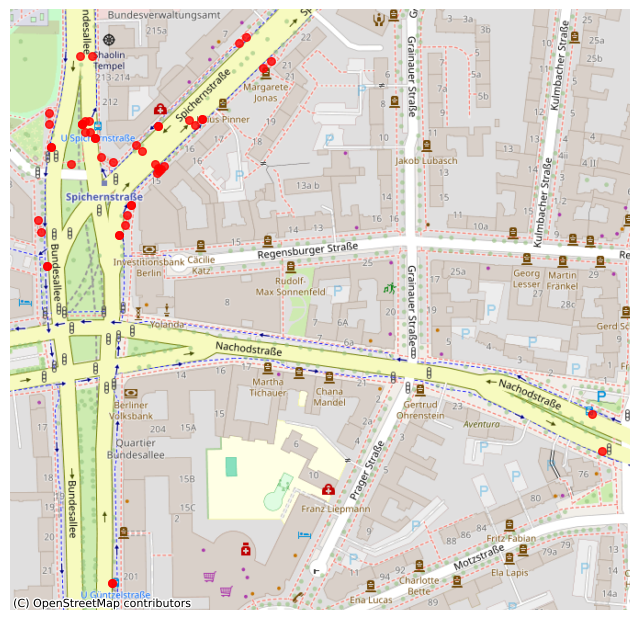

In [ ]:
import matplotlib.pyplot as plt
import contextily as cx

fig, ax = plt.subplots(figsize=(8, 8))

start_stops_3857 = start_stops.to_crs(epsg=3857)

start_stops_3857.plot(
    ax=ax,
    color="red",
    markersize=30,
    alpha=0.8
)

cx.add_basemap(
    ax,
    source=cx.providers.OpenStreetMap.Mapnik
)

ax.set_axis_off()
plt.show()


In [20]:
time_edges = build_stop_time_edges(stop_times)

time_edges.shape

Count of removed negative edges 0


(5379031, 6)

In [21]:
start_stops.head(3)

stop_id stop_code                stop_name  \
684       de:11000:900042101       NaN  U Spichernstr. (Berlin)   
15286  de:11000:900043201::4       NaN   U Güntzelstr. (Berlin)   
15287  de:11000:900042101::5       NaN  U Spichernstr. (Berlin)   

                                     stop_desc   stop_lat   stop_lon  \
684                                        NaN  52.496582  13.330613   
15286  Bushalt Bundesallee ht. Trautenaustraße  52.493608  13.331097   
15287   Bushalt Bundesallee ht. Spichernstraße  52.496771  13.330893   

       location_type parent_station  wheelchair_boarding platform_code  \
684                1            NaN                    0           NaN   
15286              0            NaN                    0           NaN   
15287              0            NaN                    0           NaN   

                            zone_id  level_id                   geometry  \
684    5555 U Spichernstr. (Berlin)       NaN  POINT (3.87e+05 5.82e+06)   
15286   5555 U Güntzelstr. (Berlin)       4.0  POINT (3.87e+05 5.82e+06)   
15287  5555 U Spichernstr. (Berlin)       4.0  POINT (3.87e+05 5.82e+06)   

       walk_dist_m  walk_time_min  
684     243.544916       3.247266  
15286   290.498246       3.873310  
15287   237.331420       3.164419

In [23]:
transfers.head(3)

from_stop_id        to_stop_id  transfer_type  min_transfer_time  \
0  de:14713:8010205  de:14713:8010205              2              300.0   
1  de:14713:8010205  de:14713:8098205              2              300.0   
2  de:15091:8012393  de:15091:8012393              2              300.0   

  from_route_id to_route_id  from_trip_id  to_trip_id  
0           NaN         NaN           NaN         NaN  
1           NaN         NaN           NaN         NaN  
2           NaN         NaN           NaN         NaN

In [24]:
from sklearn.neighbors import BallTree
import numpy as np

# mapping stop_id -> (lat, lon)
stop_coords = dict(
    zip(stops.stop_id, zip(stops.stop_lat, stops.stop_lon))
)

stop_ids = np.array(stops.stop_id)

coords_rad = np.deg2rad(
    stops[["stop_lat", "stop_lon"]].values
)

tree = BallTree(coords_rad, metric="haversine")

In [ ]:
edges_by_stop = index_edges_by_stop(time_edges)
print('edges_by_stop finished')

edges_by_stop finished


In [ ]:

departure_time_min = gtfs_time_to_minutes("08:30:00")
print('departure_time_min finished')
start_times = {
    row.stop_id: departure_time_min + row.walk_time_min
    for _, row in start_stops.iterrows()
}
print('start_times finished')


reachable_times, parents = multi_source_dijkstra_limited(
    edges_by_stop,
    start_times,
    max_travel_time_min=20,
    departure_time_min=departure_time_min
)


departure_time_min finished
start_times finished


In [ ]:
edges_by_stop


defaultdict(list,
            {'de:12065:900203471::2': [('de:12065:900203466::1',
               407.0,
               410.0,
               3.0),
              ('de:12065:900203466::1', 604.0, 607.0, 3.0),
              ('de:12065:900203466::1', 532.0, 535.0, 3.0),
              ('de:12065:900203466::1', 473.0, 476.0, 3.0),
              ('de:12065:900203466::1', 448.0, 451.0, 3.0),
              ('de:12065:900203466::1', 406.0, 409.0, 3.0),
              ('de:12065:900203466::1', 448.0, 451.0, 3.0),
              ('de:12065:900203466::1', 406.0, 409.0, 3.0),
              ('de:12065:900203466::1', 377.0, 380.0, 3.0),
              ('de:12065:900203459::2', 980.0, 983.0, 3.0),
              ('de:12065:900203459::2', 920.0, 923.0, 3.0),
              ('de:12065:900203459::2', 860.0, 863.0, 3.0),
              ('de:12065:900203459::2', 800.0, 803.0, 3.0),
              ('de:12065:900203459::2', 740.0, 743.0, 3.0),
              ('de:12065:900203459::2', 980.0, 983.0, 3.0),
            

In [ ]:
# pip install folium

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

reachable_df = (
    pd.DataFrame.from_dict(
        reachable_times,
        orient="index",
        columns=["arrival_time_min"]
    )
    .reset_index()
    .rename(columns={"index": "stop_id"})
)

reachable_df["travel_time_min"] = (
    reachable_df["arrival_time_min"] - departure_time_min
)

In [51]:
reachable_df.sort_values(by='travel_time_min', ascending=False).head(50)

stop_id  arrival_time_min  travel_time_min
148  de:11000:900057102::1             530.0             20.0
147  de:11000:900054107::2             530.0             20.0
146  de:11000:900012104::1             530.0             20.0
145  de:11000:900004104::1             530.0             20.0
143  de:11000:900060153::2             530.0             20.0
123  de:11000:900100022::1             530.0             20.0
140  de:11000:900014101::2             529.5             19.5
137  de:11000:900004105::1             529.0             19.0
132  de:11000:900054109::4             529.0             19.0
117  de:11000:900056104::6             529.0             19.0
136  de:11000:900003107::1             529.0             19.0
139  de:11000:900012154::1             529.0             19.0
138  de:11000:900009202::4             529.0             19.0
141  de:11000:900054151::1             529.0             19.0
142  de:11000:900057171::1             529.0             19.0
144  de:11000:900061105::2             529.0             19.0
130  de:11000:900051301::1             528.5             18.5
128  de:11000:900003181::1             528.0             18.0
121  de:11000:900003253::2             528.0             18.0
124  de:11000:900013102::2             528.0             18.0
127  de:11000:900009201::2             528.0             18.0
131  de:11000:900054109::2             528.0             18.0
129  de:11000:900012102::5             528.0             18.0
133  de:11000:900060107::2             528.0             18.0
134  de:11000:900061153::2             528.0             18.0
135  de:11000:900057107::2             528.0             18.0
126  de:11000:900054105::6             527.0             17.0
125  de:11000:900054102::4             527.0             17.0
122  de:11000:900012153::1             527.0             17.0
120  de:11000:900003152::2             527.0             17.0
119  de:11000:900043201::2             527.0             17.0
118  de:11000:900056104::4             527.0             17.0
115  de:11000:900051201::1             527.0             17.0
114  de:11000:900009102::4             526.5             16.5
112  de:11000:900003252::1             526.0             16.0
108  de:11000:900013103::2             526.0             16.0
111  de:11000:900003101::4             526.0             16.0
110  de:11000:900054153::3             526.0             16.0
113  de:11000:900012101::1             526.0             16.0
116  de:11000:900054154::1             526.0             16.0
79   de:11000:900044201::4             525.5             15.5
109  de:11000:900056102::8             525.0             15.0
107  de:11000:900005253::1             525.0             15.0
106  de:11000:900051303::1             525.0             15.0
105  de:11000:900009101::2             525.0             15.0
103  de:11000:900054106::2             525.0             15.0
101  de:11000:900004101::2             525.0             15.0
100  de:11000:900004101::4             525.0             15.0
66   de:11000:900056105::1             524.0             14.0
71   de:11000:900044202::2             524.0             14.0

In [52]:
reachable_gdf = build_reachable_stops_gdf(
    stops_gdf,
    reachable_times
)


In [31]:
reachable_gdf.sort_values(by='arrival_time_min', ascending=False).head(50)
print(reachable_gdf.sort_values(by='arrival_time_min', ascending=False).head(50)['arrival_time_min'])

13368    530.0
16552    530.0
17529    530.0
17778    530.0
16730    530.0
14981    530.0
20572    529.5
15428    529.0
14980    529.0
15424    529.0
16784    529.0
17777    529.0
15015    529.0
20909    529.0
14545    529.0
17524    529.0
20674    528.5
14979    528.0
17776    528.0
16551    528.0
16361    528.0
20574    528.0
15693    528.0
15427    528.0
15309    528.0
20911    528.0
20672    527.0
15426    527.0
14972    527.0
17775    527.0
15308    527.0
20931    527.0
16434    527.0
20913    526.5
15696    526.0
14725    526.0
4193     526.0
27458    526.0
17326    526.0
20576    526.0
20933    525.5
20915    525.0
15307    525.0
15109    525.0
14724    525.0
20670    525.0
14720    525.0
17774    525.0
20935    524.0
15324    524.0
Name: arrival_time_min, dtype: float64


In [32]:
lon, lat = origin['coords']
origin_correct = (lat, lon)

m = plot_reachable_stops(
    reachable_gdf,
    origin_correct  # tuple (lat, lon)
)

In [ ]:
lon, lat = origin['coords']
origin_correct = (lat, lon)  # Folium/Leaflet ожидает (lat, lon)

m = plot_reachable_stops(
    reachable_gdf,
    origin=origin_correct
)

m.save("reachable_stops.html")

In [43]:
reachable_gdf.columns

Index(['stop_id', 'stop_code', 'stop_name', 'stop_desc', 'stop_lat',
       'stop_lon', 'location_type', 'parent_station', 'wheelchair_boarding',
       'platform_code', 'zone_id', 'level_id', 'geometry', 'arrival_time_min'],
      dtype='object')

In [ ]:
isochrone_gdf = build_isochrone_convex_hull(
    reachable_gdf
)

In [39]:
import folium

m = folium.Map(location=[
    reachable_gdf.geometry.y.mean(),
    reachable_gdf.geometry.x.mean()
], zoom_start=13)

folium.GeoJson(
    isochrone_gdf,
    style_function=lambda x: {
        "fillColor": "blue",
        "color": "blue",
        "weight": 1,
        "fillOpacity": 0.3,
    },
).add_to(m)

folium.GeoJson(
    reachable_gdf,
    marker=folium.CircleMarker(radius=3, color="red"),
).add_to(m)

m.save("isochrone.html")